# ¿Cuánto cree la IA que vale tu casa? - Parte II

En el capítulo introductorio hicimos un repaso a las bases matemáticas del ajuste de funciones, y la optimización de los parámetros, y en el siguiente vimos cómo preparar los datos para el entrenamiento con modelos de IA, creo que ya es momento que nos metamos un poco más en materia y empezemos con Keras, una librería disponible en Python, sencilla de usar, y muy potente.

Pero ehhhhh! Alto ahí! Queda lo más importante, antes de empezar, tendremos que explicar un poco más a fondo es una red neuronal artifical, ¿no? 

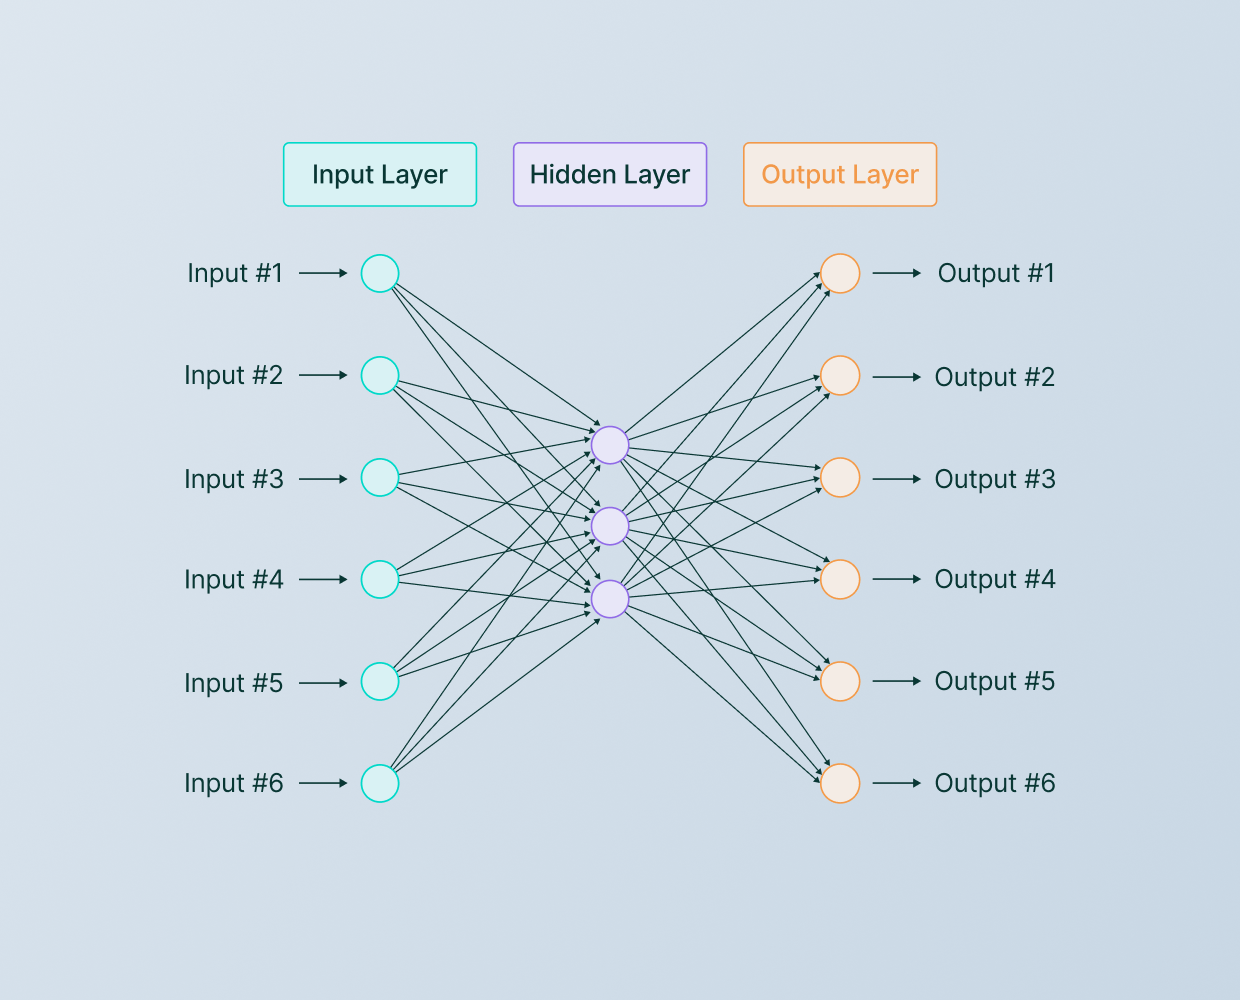

## Redes Neuronales

#### Funciones de activación
Se utilizan en las neuronas para introducir no linealidades en el modelo. Estas funciones determinan si una neurona se activa o no, es decir, si envía una señal más allá de cierto umbral.

#### Pesos internos
Son parámetros ajustables en una red neuronal que se utilizan para ponderar las entradas y determinar la salida de cada neurona. Durante el entrenamiento, estos pesos se ajustan para minimizar una función de pérdida y mejorar el rendimiento del modelo.

#### Neuronas
Las neuronas son las unidades básicas de procesamiento en una red neuronal. Cada neurona toma entradas, realiza una operación en ellas y produce una salida.

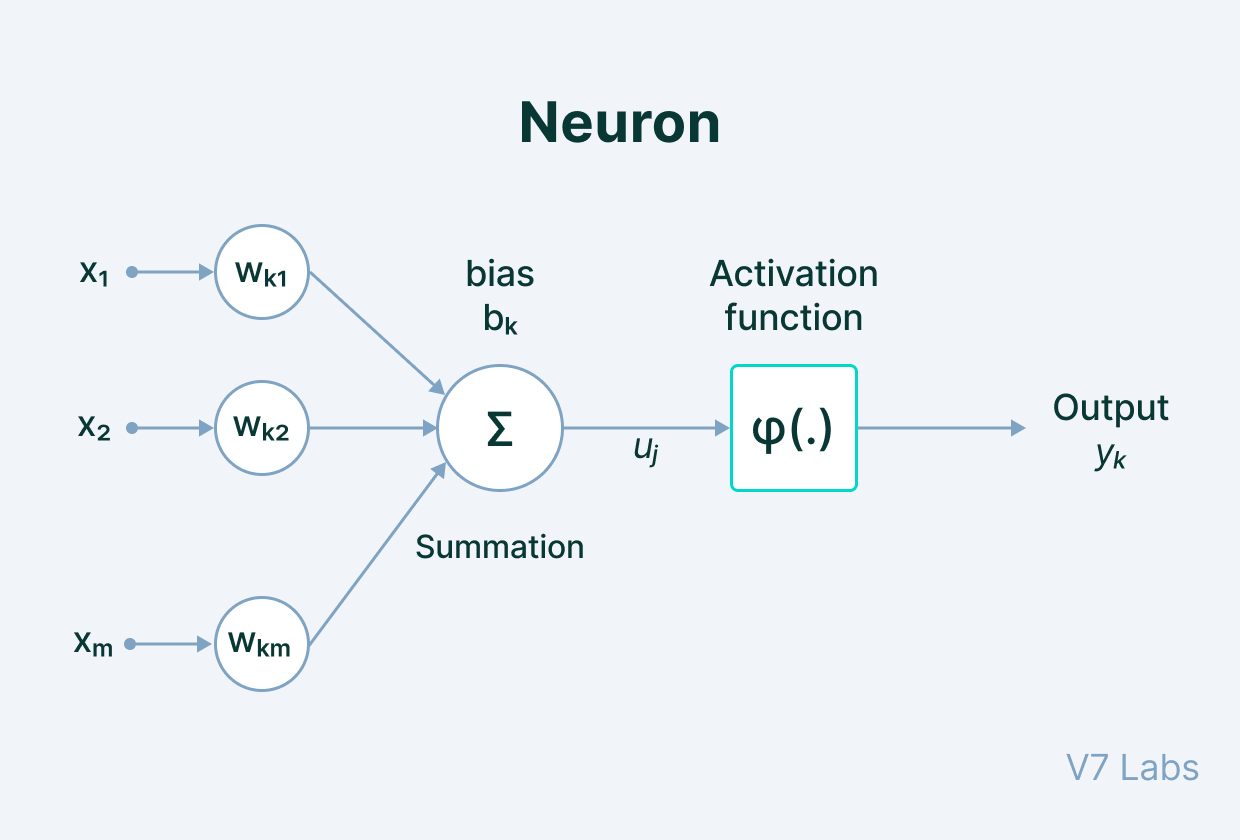

Una forma simple de definir una red neuronal es como un conjunto de operaciones matemáticas aplicadas de forma secuencial y reiterada, con el objetivo de mejorar unos parámetros, y ajustar mejor una función de pérdida. Esta es una generalización que debe ser matizada, pero puede dar una idea más intuitiva de cómo funcionan internamente los modelos.

## Construyendo un modelo con Keras para predecir el precio de la vivienda

#### Importar librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


#### Cargar datos preprocesados

In [2]:
train_df = pd.read_csv('train.csv')  
test_df = pd.read_csv('test.csv')
val_df = pd.read_csv('val.csv')

#### Separar características

In [3]:
X_train = train_df['area'].values.reshape(-1, 1) 
y_train = train_df['price'].values

X_val = val_df['area'].values.reshape(-1, 1)
y_val = val_df['price'].values

X_test = test_df['area'].values.reshape(-1, 1)
y_test = test_df['price'].values

#### Definir el modelo

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# - Número de capas ocultas: 1
# - Número de neuronas en la capa: 8 
# - Función de activación: RELU
# - Optimizador: Adam
# - Función de Pérdia: MSE

model = Sequential()
model.add(Dense(units=8, activation='relu', input_shape=(1,)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

2024-03-15 17:43:44.750897: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-15 17:43:44.827617: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-15 17:43:44.828336: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 17:43:45.743923: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Entrenamiento

In [5]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=1)
test_loss = model.evaluate(X_test, y_test)

Epoch 1/100
8/8 [==============================] - 1s 18ms/step - loss: 0.8067 - val_loss: 0.7558
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7812 - val_loss: 0.7317
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7571 - val_loss: 0.7105
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7361 - val_loss: 0.6918
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7184 - val_loss: 0.6748
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7006 - val_loss: 0.6605
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6872 - val_loss: 0.6475
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6741 - val_loss: 0.6365
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6625 - val_loss: 0.6274
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6540 - val_loss: 0.6189
Epoch 11/100
8/8 [==========

#### Visualización de resultados

6/6 [==============================] - 0s 1ms/step


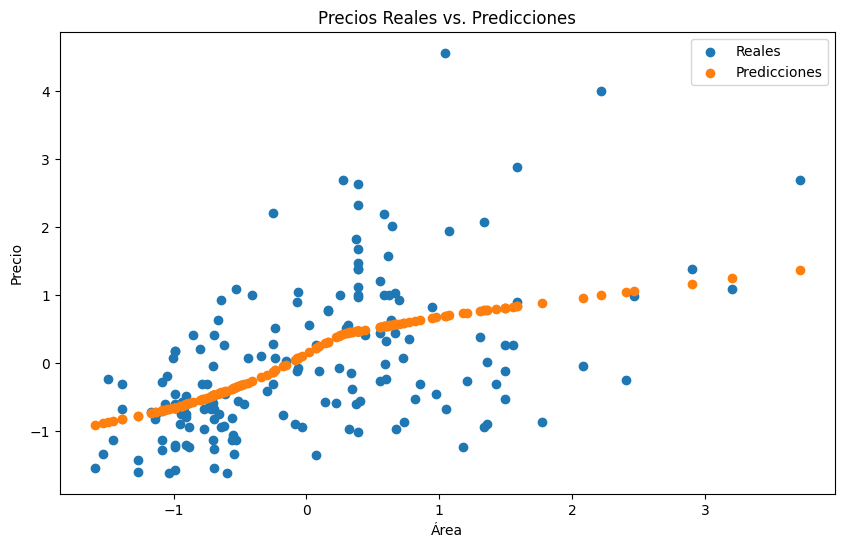

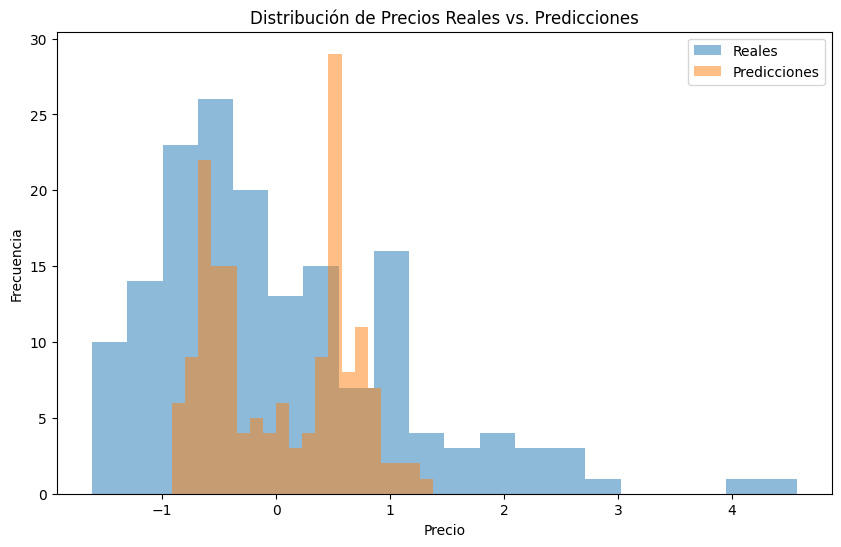

Pérdida en los datos de prueba: 0.8768940567970276


In [6]:
# Predicciones del modelo
y_pred = model.predict(X_test)

# Gráfico de dispersión de precios reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Reales')
plt.scatter(X_test, y_pred, label='Predicciones')
plt.title('Precios Reales vs. Predicciones')
plt.xlabel('Área')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Histograma de precios reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, alpha=0.5, label='Reales')
plt.hist(y_pred, bins=20, alpha=0.5, label='Predicciones')
plt.title('Distribución de Precios Reales vs. Predicciones')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


print(f'Pérdida en los datos de prueba: {test_loss}')


## Expermentando con distintas funciones de activación en la capa de salida

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=8, activation='relu', input_shape=(1,)))
model.add(Dense(units=1, activation='tanh'))                                    # Aplicación de tanh en la capa de salida
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=1)
test_loss = model.evaluate(X_test, y_test)

Epoch 1/100
8/8 [==============================] - 1s 20ms/step - loss: 0.7063 - val_loss: 0.6670
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6881 - val_loss: 0.6494
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6722 - val_loss: 0.6331
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6574 - val_loss: 0.6188
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6438 - val_loss: 0.6067
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6338 - val_loss: 0.5956
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6235 - val_loss: 0.5866
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6160 - val_loss: 0.5782
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6085 - val_loss: 0.5714
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6029 - val_loss: 0.5651
Epoch 11/100
8/8 [==========

6/6 [==============================] - 0s 1ms/step


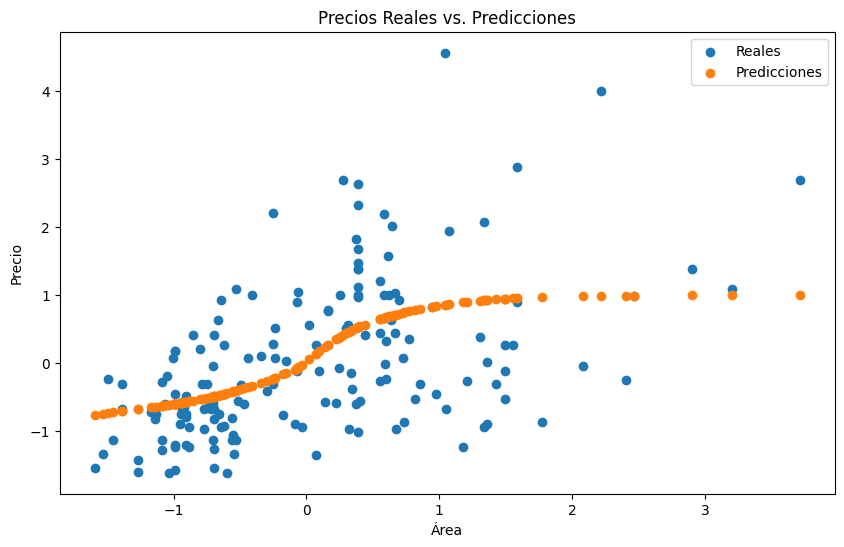

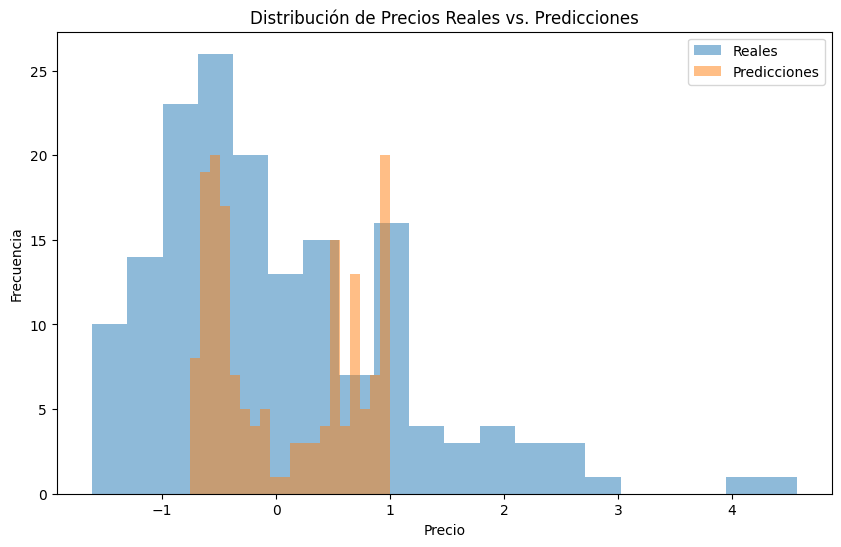

Pérdida en los datos de prueba: 0.9082147479057312


In [9]:
# Predicciones del modelo
y_pred = model.predict(X_test)

# Gráfico de dispersión de precios reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Reales')
plt.scatter(X_test, y_pred, label='Predicciones')
plt.title('Precios Reales vs. Predicciones')
plt.xlabel('Área')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Histograma de precios reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, alpha=0.5, label='Reales')
plt.hist(y_pred, bins=20, alpha=0.5, label='Predicciones')
plt.title('Distribución de Precios Reales vs. Predicciones')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

print(f'Pérdida en los datos de prueba: {test_loss}')